# 第二章 感知机

二分类模型

$f(x) = sign(w*x + b)$

损失函数 $L(w, b) = -\Sigma{y_{i}(w*x_{i} + b)}$

一般把正例归为1,负例归为-1,yi为数据的真实标签

我们知道每一个误分类点都满足-yi(w*x+b)>0

因为当我们数据点正确值为+1的时候，你误分类了，那么你判断为-1，则算出来(w*x+b)<0

当数据点是正确值为-1的时候，你误分类了，那么你判断为+1，则算出来(w*x+b>0),所以满足-yi(w*x+b)>0

所以我们利用随机梯度下降法最小化损失函数,即可保证误分类的点越少

#### 算法

随机梯度下降法,来最小化损失函数

其中,

$$\frac{\partial L}{\partial w} = -y_{i}x_{i}$$

$$\frac{\partial L}{\partial b} = -y_{i}$$

随机抽取一个误分类点使其梯度下降,学习率定义为\eta

随机梯度下降算法在更新梯度时,是沿着负梯度方向进行更新的:

$w = w + \eta y_{i}x_{i}$

$b = b + \eta y_{i}$

当实例点被误分类，即位于分离超平面的错误侧，则调整w, b的值，使分离超平面向该误分类点的一侧移动，直至误分类点被正确分类

以iris数据集中两个分类的数据和【sepal length,sepal width】作为特征

In [6]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# load data
iris = load_iris()
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df['label'] = iris.target

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
#去掉后面的(cm)，方便之后通过列的索引取值
df.columns = ['sepal length','sepal width','petal length','petal width','label']
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

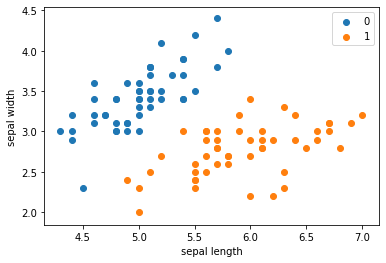

In [10]:
#先overview一下2中label的花的feature分布
#现在是用感知机作二分类，所以只挑了2个label的
plt.scatter(df[:50]['sepal length'],df[:50]['sepal width'],label = '0')
plt.scatter(df[50:100]['sepal length'],df[50:100]['sepal width'],label = '1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [11]:
# 取前100个，即label为0和1的用来做二分类，取了第一列和第二列的feature，二维方便画图，同时取了label这一列
data = np.array(df.iloc[:100,[0,1,-1]])
# X 为训练数据，不包含label，只包含feature，y为label数据
X, y = data[:,:-1],data[:,-1]
# 感知机将正例和反例分别分为1和-1，所以把标签为0和1的分别分成1和-1
y = np.array([1 if i==1 else -1 for i in y])

In [12]:
data[0]

array([5.1, 3.5, 0. ])

### 感知机的实现

In [13]:
#感知机的应用场景为数据线性可分，二分类数据的场景
#此处为一元一次线性方程
class Model:
    def __init__(self):
        self.w = np.ones(len(data[0])-1,dtype=np.float32)
        self.b = 0
        self.learning_rate = 0.1
        
    def sign(self,x,w,b):
        y = np.dot(x,w)+b
        return y
    
    #随机梯度下降
    def fit(self,X_train,y_train):
        #is_wrong 标记是否有被错误分类的样本
        is_wrong = False
        while not is_wrong:
            #统计错误分类的个数
            wrong_count = 0
            for d in range(len(X_train)):
                #取出每一个样本
                X = X_train[d]
                y = y_train[d]
                # y_ 为预测值，y为实际的标签
                y_ = self.sign(X,self.w,self.b)
                #如果被错误分类了,沿着负梯度方向更新参数w,b
                if y * y_<=0:
                    self.w = self.w+self.learning_rate*np.dot(y,X)
                    self.b = self.b+self.learning_rate*y
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
        return 'Perceptron Model is finished!'
    
    def score(self):
        pass
                    
        

In [14]:
perceptron = Model()
perceptron.fit(X,y)

'Perceptron Model is finished!'

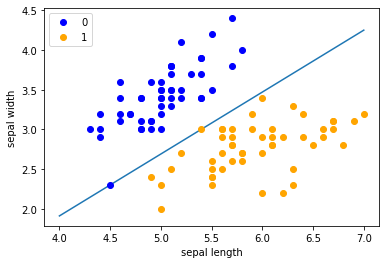

In [15]:
#线性划分x坐标轴【4,7】为10等分
x_points = np.linspace(4,7,10)
# 画出分割线
'''
y_ = w1*x1 + w2*x2 + b
要画出该直线,将横轴看成x1,纵轴看成x2,当 w1*x1 + w2*x2 + b = 0 即为该直线
所以 x2 = -(w1*x1+b)/(w2)
即下面的y_的表达式
'''
y_ = -(perceptron.w[0]*x_points + perceptron.b)/perceptron.w[1]
plt.plot(x_points,y_)

#画出样本的分布
#plot里参数 第一个为横轴，第二个为纵轴
plt.plot(data[:50,0],data[:50,1],'bo',color='blue',label='0')
plt.plot(data[50:100,0],data[50:100,1],'bo',color='orange',label = '1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [16]:
perceptron.w

array([  7.8, -10. ])

### 使用scikit-learn 包里的 感知机

In [17]:
from sklearn.linear_model import Perceptron
# 在scikit-learn (0.18.1) 版本下，这个库里跑出来的图的结果是比较好的正确的
# 在scikit-learn (0.21.2) 版本下,这个库里跑出来的图的结果感觉不太正确....
# fit进去的数据集都是一样的，下图为在 (0.21.2)版本下跑出来的结果...
# 好了，今天有次在服务器上跑也正常了，我也不知道为啥..........

In [18]:
clf = Perceptron(fit_intercept=False,max_iter=1000,shuffle=False)
clf.fit(X,y)
clf

/home/zelin/mytorch/torch/lib64/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=False, max_iter=1000, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=False, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [19]:
# 设置feature的权重
print(clf.coef_)
# clf.coef_ = [[74.6,-127.2]]

[[  74.6 -127.2]]


In [20]:
# 截距
print(clf.intercept_)

[0.]


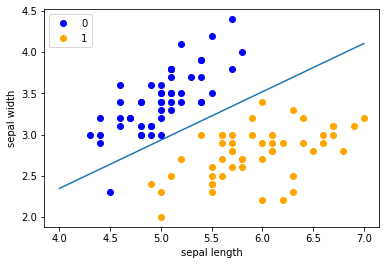

In [22]:
x_points = np.arange(4,8)
y_ = -(clf.coef_[0][0]*x_points + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_points,y_)

plt.plot(data[:50,0],data[:50,1],'bo',color = 'blue',label = '0')
plt.plot(data[50:100,0],data[50:100,1],'bo',color = 'orange',label = '1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()